In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report
%matpotlib inline

In [3]:
x1,y1=make_gaussian_quantiles(n_samples=500,n_features=2,n_classes=2)
x2,y2=make_gaussian_quantiles(mean=(3,3),n_samples=500,n_features=2,n_classes=2)
x_data=np.concatenate((x1,x2))
y_data=np.concatenate((y1,-y2+1))

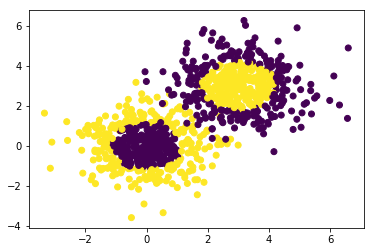

In [4]:
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [8]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(x_data,y_data)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
def plot(model):
    x_min,x_max=x_data[:,0].min()-1,x_data[:,0].max()+1
    y_min,y_max=x_data[:,1].min()-1,x_data[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),
                      np.arange(y_min,y_max,0.02)
                     )
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    cs=plt.contourf(xx,yy,z)

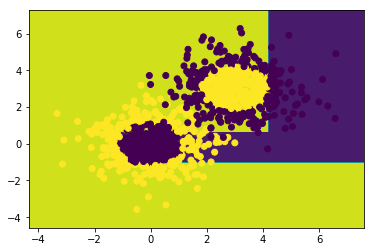

In [12]:
plot(dtree)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [13]:
dtree.score(x_data,y_data)

0.747

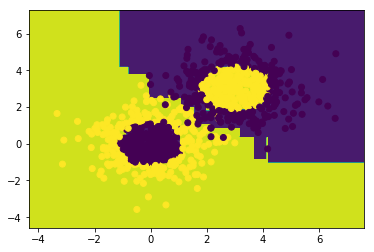

In [15]:
Abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)
Abc.fit(x_data,y_data)
plot(Abc)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [16]:
Abc.score(x_data,y_data)

0.983